<a href="https://colab.research.google.com/github/sabrinabms/RNA-MPCA-students/blob/main/rna%26mpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Rede Neural auto-configurada</h1>


In [1]:
# Importando as bibliotecas necessárias
import os.path
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [ ]:
%cd /content

In [ ]:
# Verifica se pasta jah existe, se sim ela eh deletada para poder atualizar com
# a nova versao do Github

pasta = 'RNA-MPCA'

if os.path.isdir(pasta): # vemos que este diretorio já existe
  print ('Ja existe uma pasta com esse nome!')
  shutil.rmtree(pasta)

In [ ]:
# Cria uma cópia de trabalho em um repositório local: Github

!git clone https://github.com/sabrinabms/RNA-MPCA-students.git
# !git pull

In [ ]:
%cd RNA-MPCA-students//

In [2]:
cwd = os.getcwd()
pasta_data = cwd+'/data/'
entrada = pd.read_csv(pasta_data + 'x_in.txt', encoding="utf-16", header=None, delimiter=r"\s+")
saida = pd.read_csv(pasta_data + 'y_in.txt',encoding="utf-16", header=None, delimiter=r"\s+")

In [3]:
entrada_gen = pd.read_csv(pasta_data + 'x_gen_in.txt', encoding="utf-16", header=None, delimiter=r"\s+")
saida_gen = pd.read_csv(pasta_data + 'y_gen_in.txt',encoding="utf-16", header=None, delimiter=r"\s+")

In [16]:
entrada_valid = pd.read_csv(pasta_data + 'x_valid_in.txt', encoding="utf-16", header=None, delimiter=r"\s+")
saida_valid = pd.read_csv(pasta_data + 'y_valid_in.txt',encoding="utf-16", header=None, delimiter=r"\s+")

In [4]:
entrada.shape, saida.shape

((5, 3600), (1, 3600))

In [4]:
entrada_gen.shape, saida_gen.shape

((5, 3600), (1, 3600))

In [17]:
entrada_valid.shape, saida_valid.shape

((5, 1350), (1, 1350))

In [5]:
entrada_num = entrada.to_numpy()
saida_num = saida.to_numpy()

In [6]:
entrada_gen_num = entrada_gen.to_numpy()
saida_gen_num = saida_gen.to_numpy()

In [20]:
entrada_valid_num = entrada_valid.to_numpy()
saida_valid_num = saida_valid.to_numpy()

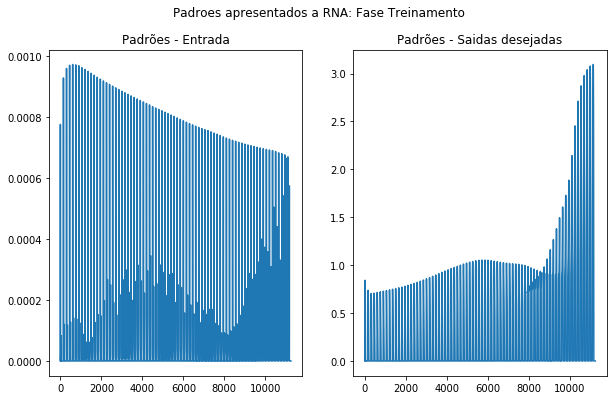

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('Padroes apresentados a RNA: Fase Treinamento')
axes[0].set_title('Padrões - Entrada')
axes[0].plot(entrada_num[0,0:11250])
axes[1].set_title('Padrões - Saidas desejadas')
axes[1].plot(saida_num[0,0:11250])

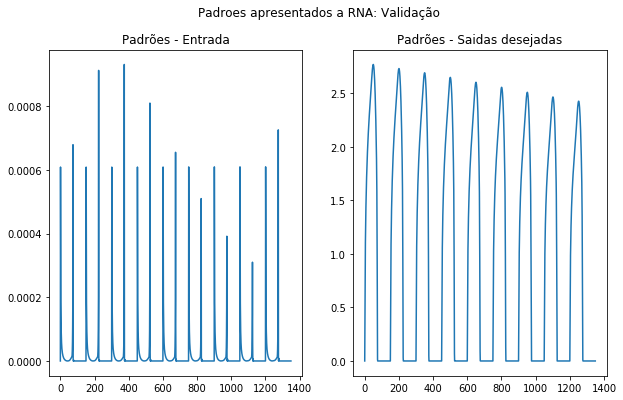

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('Padroes apresentados a RNA: Validação')
axes[0].set_title('Padrões - Entrada')
axes[0].plot(entrada_gen_num[0,0:1350])
axes[1].set_title('Padrões - Saidas desejadas')
axes[1].plot(saida_gen_num[0,0:1350])

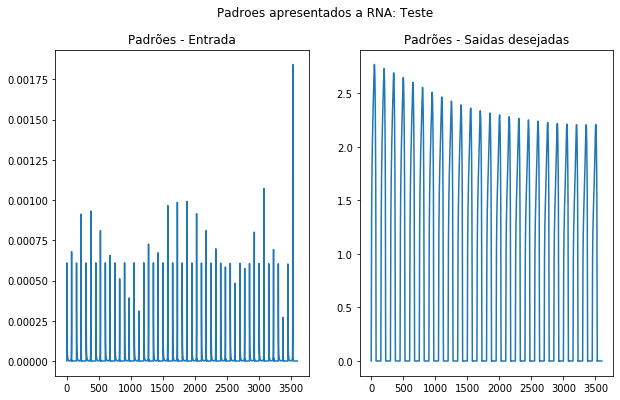

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('Padroes apresentados a RNA: Teste')
axes[0].set_title('Padrões - Entrada')
axes[0].plot(entrada_gen_num[0,0:11250])
axes[1].set_title('Padrões - Saidas desejadas')
axes[1].plot(saida_gen_num[0,0:11250])

## Normalizando os dados da RNA

    Dados treinamento

In [10]:
min_entrada = entrada_num.min()
min_saida = saida_num.min()
max_entrada = entrada_num.max()
max_saida = saida_num.max()

In [11]:
#z = x - min(x) / max(x) - min(x)
entrada_norm = (entrada_num - min_entrada) / (max_entrada - min_entrada)
saida_norm = (saida_num - min_saida) / (max_saida - min_saida)

In [12]:
np.savetxt(pasta_data +'x.txt', entrada_norm, delimiter=" ") 
np.savetxt(pasta_data +'y.txt', saida_norm, delimiter=" ")

    Dados validação

In [21]:
min_entrada_valid = entrada_valid_num.min()
min_saida_valid = saida_valid_num.min()
max_entrada_valid = entrada_valid_num.max()
max_saida_valid = saida_valid_num.max()

In [22]:
#z = x - min(x) / max(x) - min(x)
entrada_valid_norm = (entrada_num - min_entrada) / (max_entrada - min_entrada)
saida_valid_norm = (saida_num - min_saida) / (max_saida - min_saida)

In [23]:
np.savetxt(pasta_data +'x_valid.txt', entrada_norm, delimiter=" ") 
np.savetxt(pasta_data +'y_valid.txt', saida_norm, delimiter=" ")

    Dados teste

In [13]:
min_entrada_gen = entrada_gen_num.min()
min_saida_gen = saida_gen_num.min()
max_entrada_gen = entrada_gen_num.max()
max_saida_gen = saida_gen_num.max()

In [14]:
#z = x - min(x) / max(x) - min(x)
entrada_gen_norm = (entrada_gen_num - min_entrada_gen) / (max_entrada_gen - min_entrada_gen)
saida_gen_norm = (saida_gen_num - min_saida_gen) / (max_saida_gen - min_saida_gen)

In [15]:
np.savetxt(pasta_data +'x_gen.txt', entrada_norm, delimiter=" ") 
np.savetxt(pasta_data +'y_gen.txt', saida_norm, delimiter=" ")

# **Iniciando o processo: RNA&MPCA**


In [ ]:
!make clean
!make

# **Definir no próximo bloco os valores das seguintes variáveis:**
*   **n_proc**: numero de processadores
*   **n_exp**: numero de experimentos

In [ ]:
n_proc = 2
n_exp = 2

# Iniciando a fase de auto configuração da RNA

In [ ]:
!./runMPCA {n_exp} {n_proc}

# Com a RNA auto-configurada, inicia-se agora a fase de teste, um pequeno conjunto de dados é usado para verificar a resposta da RNA para o problema em questão

In [ ]:
!./annTest {n_exp} {n_proc}

# Agora a RNA já está configurada e testada, pronta para ativação, ou seja, qualquer conjunto de dados pertinente ao problema poderá ser usado para obter uma resposta




In [ ]:
!./annActivation

# Verificar o resultado da RNA através dos gráficos

In [ ]:
pasta_out = cwd+'/output/'
saida_out = pd.read_csv(pasta_out + 'result_ys.out', delim_whitespace=True)
# saida_act = pd.read_csv(pasta_out + 'y_activation.txt', delim_whitespace=True)

In [ ]:
saida_out_num = saida_out.to_numpy()
saida_out_num_t = saida_out_num.transpose()
saida_out_num_t.shape

In [ ]:
f2_master, f2_axes = plt.subplots(figsize=(5,10))
f2_master.suptitle('Saidas da RNA: Perfil de temperatura', size = 20)
f2_axes.set_title('Saidas obtidas')
f2_axes.plot(saida_out_num_t[10:,0:10],eixo_y[10:])
f2_axes.set_yscale('log')
f2_axes.invert_yaxis()